Notebook zu Objektorientierung: Assoziationen

Version 1.3, 12. März 2024, Informatik, EAH Jena

(c) Christina B. Class



**Hinweis:** In diesem Notebook verzichten wir auf Information Hiding, um den Code ohne getter und setter Methoden etwas kürzer zu gestalten und `jdc` verwenden zu können.`jdc` ermöglicht es, *einmal* eine Methodenimplementation zu "überschreiben", so dass wir nur jedes zweite Mal den kompletten Code der Klasse angeben müssen.

Importieren Sie `jdc` mit der folgenden Zeile.


In [ ]:
import jdc

# Assoziationen

## 1. Einführung

Eine Assoziation ist eine **Beziehung** zwischen Klassen.

**Wichtig**: Bei einer Assoziation wissen **beide** Seiten voneinander Bescheid. 

Zum Beispiel in einer Ehe wissen beide Ehepartner vom anderen Bescheid, sie wissen, dass sie verheiratet sind.

Verwendet eine Klasse eine andere Klasse (z.B. die Klasse `str`, weil sie eine Zeichenkette abspeichert, oder die Klasse `list`, weil mehrere Werte in einer Liste abgespeichert werden, ist das auch eine Beziehung. Hier handelt es sich aber um eine "uses" oder "benutzt" Beziehung. Die verwendete Klasse (`str` oder `list`) muss nicht darüber Bescheid wissen, welche Klassen sie verwenden. Die Klasse `str` muss also nicht wissen, dass sie z.B. in meiner Klasse `Person` verwendet wird, ich also ein Attribut definiere, das den Namen der Person speichert.

Bei einer Assoziation hingegen ist es möglich, von jeder Seite ausgehend den oder die Beziehungspartner zu finden. Wenn die eine Seite einer Beziehung die Beziehung "beginnt" oder "beendet", muss also die andere Seite darüber "informiert" werden.

Die grundlegende Idee in beiden Fällen ist hierbei die gleiche, daher werden wir in diesem Kurs nur implementieren, dass eine Beziehung definiert wird. Ein analoges Vorgehen ist dann für das Löschen einer Beziehung zu implementieren.

In diesem Notebook werden Sie Schritt für Schritt sehen, was notwendig ist, damit beide Beziehungspartner voneinander Bescheid wissen.


## 2. Das Beispiel

Wir werden folgende Assoziation implementieren:

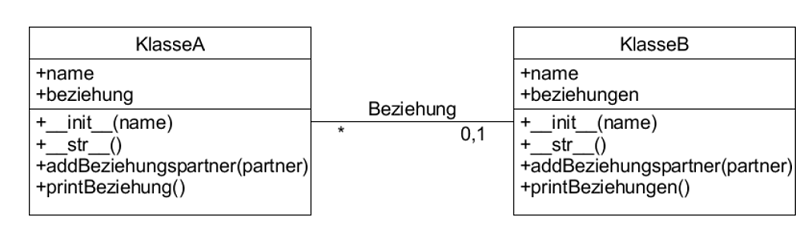

Die Beziehung besteht zwischen `KlasseA` und `KlasseB`. Ein Objekt der `KlasseA` hat also eine Beziehung mit einem oder keinem Objekt der `KlasseB`. Ein Objekt der `KlasseB` kann beliebig viele Beziehungen mit Objekten der `KlasseA` haben. 

Daher hat `KlasseA` eine einfache Variable, um den Beziehungspartner zu speichern, in `KlasseB` wird eine Liste verwendet, um die Beziehungspartner zu speichern.

Zuerst aber einmal den Rahmen der beiden Klassenimplementationen. Die `KlasseA`:


In [ ]:
class KlasseA:
    def __init__(self,name):
        self.name=name
        self.beziehung=None
        
    def __str__(self):
        return 'KlasseA: '+self.name
    
    def printBeziehung(self):
        print(self.beziehung)
        
    def addBeziehungspartner(self,partner):
        pass

Erinnerung: `pass` zeigt an, dass in diesem "Block" noch keine Implementation vorhanden ist.

Und die `KlasseB`:

In [ ]:
class KlasseB:
    def __init__(self,name):
        self.name=name
        self.beziehungen=[]
        
    def __str__(self):
        return 'KlasseB: '+self.name
        
    def printBeziehungen(self):
        for b in self.beziehungen:
            print(b)
        
    def addBeziehungspartner(self,partner):
        pass

## 3. Implementation der Assoziation

Wir implementieren nun die Assoziation. Wir beginnen damit, dass wir die Methode `addBeziehungspartner()` in der `KlasseA` implementieren. 
Zur Erinnerung: Objekte der `KlasseA` stehen mit keinem oder einem Objekt der `KlasseB` in Beziehung.


## 3.1 Erster Versuch

Wir implementieren nun die Methode `addBeziehungspartner()` der `KlasseA`.  

In [ ]:
%%add_to KlasseA
def addBeziehungspartner(self,partner):
    self.beziehung=partner

Um zu testen, definieren wir nun ein Objekt der `KlasseA` und ein Objekt der `KlasseB`. 

In [ ]:
a1=KlasseA('a1')
b1=KlasseB('b1')

Und nun addieren wir `b1` als Beziehungspartner von `a1`.

In [ ]:
a1.addBeziehungspartner(b1)

Und nun testen wir, ob es geklappt hat:

In [ ]:
print(a1,'mit Beziehung:')
a1.printBeziehung()

Das hat doch gut geklappt! 

Wir sollten jedoch noch etwas anderes prüfen. Wir haben ja gesagt, dass die Beziehungspartner voneinander wissen. Also müssen wir nun überprüfen, ob das Objekt `b1` von `a1` weiss:

In [ ]:
print(b1,'hat Beziehungen:')
b1.printBeziehungen()

Und hier haben wir nun ein kleines Problem! `b1` weiss nichts von einem Beziehungspartner.
Wir müssen nun also
1. die Methode `addBeziehungspartner()` in der `KlasseB` implementieren und dann 
2. diese Methode mit dem Objekt `a1` als Parameter aufrufen, wenn wir das Objekt `b1` als Beziehungsparttner von `a1` definieren.

## 3.2 Zweiter Versuch

Wir fügen also die Methode `addBeziehungspartner()` in der `KlasseB` hinzu.

In [ ]:
%%add_to KlasseB
def addBeziehungspartner(self,partner):
    self.beziehungen.append(partner)

Und wir verändern nun die Methode `addBeziehungspartner()` in `KlasseA` (da wir mit `jdc` eine Methode nur einmal verändern können, geben wir den Code der ganzen Klasse an):

In [ ]:
class KlasseA:
    def __init__(self,name):
        self.name=name
        self.beziehung=None
        
    def __str__(self):
        return 'KlasseA: '+self.name
    
    def printBeziehung(self):
        print(self.beziehung)

    def addBeziehungspartner(self,partner):
        self.beziehung=partner
        # mit diesem Code rufen wir die Methode im partner Objekt auf
        partner.addBeziehungspartner(self)

`self` bezeichnet das Objekt selber. Mit `partner.addBeziehungspartner(self)` ruft ein Objekt die Methode `addBeziehungspartner()` des Objektes `partner` auf und übergibt eine Referenz auf "sich selber" als aktuellen Parameterwert. Wir können das umschreiben als: "`partner` führe aus `addBeziehungspartner()` mit mir als Parameter". 

Und nun führen wir ein paar Tests durch:

**Test 1:**
Wir definieren ein Objekt `a1` der `KlasseA` und ein Objekt `b1` der `KlasseB`. Die Beziehung wird im Objekt `a1` definiert.

In [ ]:
a1=KlasseA('a1')
b1=KlasseB('b1')
a1.addBeziehungspartner(b1)
print(a1,'hat Beziehung:')
a1.printBeziehung()
print()
print(b1,'hat Beziehungen')
b1.printBeziehungen()

Wunderbar! Es funktioniert!

**Test 2:** Nun definieren wir noch ein neues Objekt `a2` und setzen es auch in Beziehung mit `b1`:

In [ ]:
a2=KlasseA('a2')
a2.addBeziehungspartner(b1)
print(a2,'hat Beziehung:')
a2.printBeziehung()
print()
print(b1,'hat Beziehungen')
b1.printBeziehungen()

Schön! :-)

Wir machen nun den Test in die andere Richtung.

**Test 3:** Wir erzeugen ein neues Objekt `a3` und sagen `b1`, dass es in Beziehung zu `a3` steht.

In [ ]:
a3=KlasseA('a3')
b1.addBeziehungspartner(a3)
print(b1,'hat Beziehungen')
b1.printBeziehungen()
print()
print(a3,'hat Beziehung:')
a3.printBeziehung()

Und jetzt sehen wir ein neues Problem. `b1` weiss zwar, dass es eine Beziehung mit `a3`hat, `a3` hat davon allerdings keine Ahnung. 



## 3.3 Dritter Versuch

Wir rufen in der Methode `addBeziehungspartner()` der `KlasseB` die Methode `addBeziehungspartner()` in `KlasseA` auf, um `a3` über den Beziehungspartner der `KlasseB` zu informieren.

Die neue Implementation der `KlasseB` lautet also:

In [ ]:
class KlasseB:
    def __init__(self,name):
        self.name=name
        self.beziehungen=[]
        
    def __str__(self):
        return self.name

        
    def printBeziehungen(self):
        for b in self.beziehungen:
            print(b)
        
    def addBeziehungspartner(self,partner):
        self.beziehungen.append(partner)
        partner.addBeziehungspartner(self)

Nun testen wir das erneut:

In [ ]:
b1=KlasseB('b1')
a1=KlasseA('a1')
b1.addBeziehungspartner(a1)
print(b1,'hat Beziehungen')
b1.printBeziehungen()
print(a1,'hat Beziehung:')
a1.printBeziehung()

**Oups! Das sieht nicht gut aus.**

Entweder sehen Sie "RecursionError: maximum recursion depth exceeded while calling a Python object" oder Sie wurden durch ein Pop-up Fenster darüber informiert, dass Python aufgehört hat.

Wir haben einen **Rekursionsfehler**!

Rekursion liegt dann vor, wenn eine Funktion sich selber direkt oder indirekt aufruft. Und für eine Rekursion müssen wir eine Rekursionsbasis definieren, also einen Fall, der ohne diesen Funktionsaufruf berechnet wird.

Also schauen wir mal, was passiert ist.

`b1` hat `a1` als Beziehungspartner definiert und `a1` gesagt, es sei jetzt Beziehungspartner,

dann hat `a1` `b1` als Beziehungspartner definiert und `b1` gesagt, es sei jetzt Beziehungspartner,

dann hat `b1` `a1` als Beziehungspartner definiert und `a1` gesagt, es sei jetzt Beziehungspartner,

dann hat `a1` `b1` als Beziehungspartner definiert und `b1` gesagt, es sei jetzt Beziehungspartner,

und so weiter

Irgendwann ist der Speicher voll, in dem Python sich die Methodenaufrufe merkt, und es gibt den Rekursionsfehler.

## 3.4 Die Lösung

Die Lösung besteht daran, dass jeder der Beziehungspartner überprüft, ob die Beziehung, die "gemeldet" wird, schon existiert. Nur wenn es eine neue Beziehung ist, wird sie eingetragen und der Beziehungspartner informiert. 

Auf beiden Seiten implementieren wir also eine Selektion (`if`).

In [ ]:
class KlasseA:
    def __init__(self,name):
        self.name=name
        self.beziehung=None
        
    def __str__(self):
        return 'KlasseA: '+self.name
    
    def printBeziehung(self):
        print(self.beziehung)

    def addBeziehungspartner(self,partner):
        if self.beziehung==None:
            self.beziehung=partner
            partner.addBeziehungspartner(self)

In [ ]:
class KlasseB:
    def __init__(self,name):
        self.name=name
        self.beziehungen=[]
        
    def __str__(self):
        return self.name

        
    def printBeziehungen(self):
        for b in self.beziehungen:
            print(b)

    def addBeziehungspartner(self,partner):
        if partner not in self.beziehungen:
            self.beziehungen.append(partner)
            partner.addBeziehungspartner(self)

Und nun testen wir wieder alles:

In [ ]:
a1=KlasseA('a1')
b1=KlasseB('b1')
a1.addBeziehungspartner(b1)
print(a1,'hat Beziehung:')
a1.printBeziehung()
print()
print(b1,'hat Beziehungen')
b1.printBeziehungen()

funktioniert :-)

In [ ]:
a2=KlasseA('a2')
a2.addBeziehungspartner(b1)
print(a2,'hat Beziehung:')
a2.printBeziehung()
print()
print(b1,'hat Beziehungen')
b1.printBeziehungen()

funktioniert :-)

In [ ]:
a3=KlasseA('a3')
b1.addBeziehungspartner(a3)
print(b1,'hat Beziehungen')
b1.printBeziehungen()
print()
print(a3,'hat Beziehung:')
a3.printBeziehung()

funktioniert :-)

## 3.5 Wichtiger Hinweis

Denken Sie daran, die Selektion auf **beiden Seiten der Beziehung** zu implementieren. 

Lassen wir zum Beispiel die Bedingung in `KlasseB` weg:


In [ ]:
class KlasseA:
    def __init__(self,name):
        self.name=name
        self.beziehung=None
        
    def __str__(self):
        return self.name
    
    def hasBeziehung(self):
        if self.beziehung==None:
            return False
        else:
            return True
        
    def printBeziehung(self):
        print(self.beziehung)
        
    def addBeziehungspartner(self,partner):
        if self.beziehung==None:
            self.beziehung=partner
            partner.addBeziehungspartner(self)
    
class KlasseB:
    def __init__(self,name):
        self.name=name
        self.beziehungen=[]
        
    def __str__(self):
        return self.name

        
    def printBeziehungen(self):
        for b in self.beziehungen:
            print(b)
        
    def addBeziehungspartner(self,partner):
        self.beziehungen.append(partner)
        partner.addBeziehungspartner(self)

**Test 1:** wir fügen die Beziehung in einem Objekt der `KlasseA` ein:

In [ ]:
a1=KlasseA('a1')
b1=KlasseB('b1')
a1.addBeziehungspartner(b1)
print(a1,'hat Beziehung:')
a1.printBeziehung()
print()
print(b1,'hat Beziehungen')
b1.printBeziehungen()

Test bestanden! :-)

**Test 2:** wir fügen die Beziehung in einem Objekt der `KlasseB` ein:

In [ ]:
a1=KlasseA('a1')
b1=KlasseB('b1')
b1.addBeziehungspartner(a1)
print(a1,'hat Beziehung:')
a1.printBeziehung()
print()
print(b1,'hat Beziehungen')
b1.printBeziehungen()

Dieser Test ist nicht bestanden, denn `b1` hat die Beziehung zu Objek `a1` nun zwei mal eingetragen. Dies ist folgendermaßen passiert:

`b1` hat `a1` **als Beziehungspartner definiert** und `a1` gesagt, es sei jetzt Beziehungspartner,

dann hat `a1` `b1` als Beziehungspartner definiert und `b1` gesagt, es sei jetzt Beziehungspartner,

dann hat `b1` `a1` **erneut als Beziehungspartner definiert** und `a1` gesagt, es sei jetzt Beziehungspartner,

dann hat `a1` **festgestellt**, dass es bereits einen Beziehungspartner hat und beendet alles.

Aber da `b1` nicht getestet hat, ob `a1` bereits in der Liste ist, hat `b1` `a1` eben zweimal eingetragen.

Sie sagen, das macht nichts? Da bin ich mir nicht so sicher. Wenn die `KlasseB` der Verein und `KlasseA` die Sportlerin ist, dann ist `a1` nun eben Doppeltmitglied und muss zwei Beiträge zahlen... sie wird sich bestimmt freuen...

**Merke**: Um Assoziationen zu implementieren:
- muss der Beziehungspartner informiert werden, d.h. die entsprechende Methode muss aufgerufen werden
- muss sichergestellt werden, dass ein Beziehungspartner nur einmal hinzugefügt wird, hierfür verwenden wir eine Selektion (`if`).

*Ende des Notebooks*

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Dieses Notebook wurde von Christina B. Class für die Lehre an der EAH Jena erstellt. Es ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Namensnennung - Nicht kommerziell - Keine Bearbeitungen 4.0 International Lizenz</a>.